<a href="https://colab.research.google.com/github/shrilak412/Credit-Risk-Forecasting-and-Validation-for-Equipment-Financing-Loans/blob/main/CrediT_RISK_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, precision_score, recall_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [1]:
# prompt: i want to read a csv from google drive

import pandas as pd
# Assuming your CSV file is in 'MyDrive/data/your_file.csv'
file_path = '/content/drive/MyDrive/credit_risk_project/accepted-2007-2018.csv'  # Update with your actual file path
try:
  df = pd.read_csv(file_path,low_memory=False)
  print(df.head(20)) # Display first few rows of dataframe to verify
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   68407277        NaN     3600.0       3600.0           3600.0   36 months   
1   68355089        NaN    24700.0      24700.0          24700.0   36 months   
2   68341763        NaN    20000.0      20000.0          20000.0   60 months   
3   66310712        NaN    35000.0      35000.0          35000.0   60 months   
4   68476807        NaN    10400.0      10400.0          10400.0   60 months   
5   68426831        NaN    11950.0      11950.0          11950.0   36 months   
6   68476668        NaN    20000.0      20000.0          20000.0   36 months   
7   67275481        NaN    20000.0      20000.0          20000.0   36 months   
8   68466926        NaN    10000.0      10000.0          10000.0   36 months   
9   68616873        NaN     8000.0       8000.0           8000.0   36 months   
10  68356421        NaN    22400.0      22400.0          22400.0   60 months   
11  68426545        NaN    16000.0      

In [3]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [137]:
import pandas as pd

# Load relevant columns
use_cols = ["loan_amnt", "int_rate", "annual_inc", "dti", "fico_range_low", "emp_length", "term", "grade",
            "loan_status", "total_rec_prncp", "total_pymnt", "issue_d", "purpose"]
df_cleaned = pd.read_csv('/content/drive/MyDrive/credit_risk_project/accepted-2007-2018.csv', usecols=use_cols)
df_cleaned.head(20)

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,issue_d,loan_status,purpose,dti,fico_range_low,total_pymnt,total_rec_prncp
0,3600.0,36 months,13.99,C,10+ years,55000.0,Dec-2015,Fully Paid,debt_consolidation,5.91,675.0,4421.723917,3600.00
1,24700.0,36 months,11.99,C,10+ years,65000.0,Dec-2015,Fully Paid,small_business,16.06,715.0,25679.660000,24700.00
2,20000.0,60 months,10.78,B,10+ years,63000.0,Dec-2015,Fully Paid,home_improvement,10.78,695.0,22705.924294,20000.00
3,35000.0,60 months,14.85,C,10+ years,110000.0,Dec-2015,Current,debt_consolidation,17.06,785.0,31464.010000,19102.35
4,10400.0,60 months,22.45,F,3 years,104433.0,Dec-2015,Fully Paid,major_purchase,25.37,695.0,11740.500000,10400.00
5,11950.0,36 months,13.44,C,4 years,34000.0,Dec-2015,Fully Paid,debt_consolidation,10.20,690.0,13708.948530,11950.00
6,20000.0,36 months,9.17,B,10+ years,180000.0,Dec-2015,Fully Paid,debt_consolidation,14.67,680.0,21393.800000,20000.00
7,20000.0,36 months,8.49,B,10+ years,85000.0,Dec-2015,Fully Paid,major_purchase,17.61,705.0,21538.508977,20000.00
8,10000.0,36 months,6.49,A,6 years,85000.0,Dec-2015,Fully Paid,credit_card,13.07,685.0,10998.971575,10000.00
9,8000.0,36 months,11.48,B,10+ years,42000.0,Dec-2015,Fully Paid,credit_card,34.80,700.0,8939.580503,8000.00


In [138]:
df_small_business = df_cleaned[df_cleaned["purpose"] == "small_business"]
print(f"Number of small business loans: {len(df_small_business)}")
print(df_small_business.head())

Number of small business loans: 24689
     loan_amnt        term  int_rate grade emp_length  annual_inc   issue_d  \
1      24700.0   36 months     11.99     C  10+ years     65000.0  Dec-2015   
30     16000.0   36 months     12.88     C  10+ years     65000.0  Dec-2015   
482    14000.0   60 months     19.89     E  10+ years     80000.0  Dec-2015   
609    10000.0   36 months     11.48     B    2 years    105000.0  Dec-2015   
744    10000.0   60 months     19.48     E   < 1 year    117000.0  Dec-2015   

     loan_status         purpose    dti  fico_range_low   total_pymnt  \
1     Fully Paid  small_business  16.06           715.0  25679.660000   
30   Charged Off  small_business  18.96           675.0  17396.630000   
482   Fully Paid  small_business  14.39           700.0  14522.340000   
609  Charged Off  small_business  36.81           660.0   9567.190000   
744   Fully Paid  small_business  12.73           735.0  12816.558865   

     total_rec_prncp  
1           24700.00  
30

In [139]:
print(df_small_business.isnull().sum())
print(df_small_business["loan_status"].value_counts())

loan_amnt            0
term                 0
int_rate             0
grade                0
emp_length         708
annual_inc           0
issue_d              0
loan_status          0
purpose              0
dti                 17
fico_range_low       0
total_pymnt          0
total_rec_prncp      0
dtype: int64
loan_status
Fully Paid                                             10836
Current                                                 8591
Charged Off                                             4580
Late (31-120 days)                                       339
In Grace Period                                          111
Does not meet the credit policy. Status:Fully Paid        89
Does not meet the credit policy. Status:Charged Off       72
Late (16-30 days)                                         71
Name: count, dtype: int64


In [140]:
# Basic statistics
print("Dataset Shape:", df_small_business.shape)
print("\nSummary Statistics:")
print(df_small_business.describe())

# Ccheck for missing values
print("\nMissing Values:")
print(df_small_business.isnull().sum())

# Distribution of loan_status (target for PD)
print("\nLoan Status Distribution:")
print(df_small_business["loan_status"].value_counts(normalize=True))

Dataset Shape: (24689, 13)

Summary Statistics:
          loan_amnt      int_rate    annual_inc           dti  fico_range_low  \
count  24689.000000  24689.000000  2.468900e+04  24672.000000    24689.000000   
mean   16442.694115     15.263721  9.397267e+04     15.031074      705.260440   
std    10245.608646      5.410164  8.279709e+04     12.429107       37.603269   
min      500.000000      5.310000  0.000000e+00      0.000000      640.000000   
25%     8000.000000     11.440000  5.100000e+04      8.060000      675.000000   
50%    15000.000000     14.740000  7.500000e+04     13.850000      695.000000   
75%    24000.000000     18.840000  1.100000e+05     20.590000      725.000000   
max    40000.000000     30.990000  4.860012e+06    999.000000      845.000000   

        total_pymnt  total_rec_prncp  
count  24689.000000     24689.000000  
mean   13018.723733      9797.498531  
std    10826.000999      8908.148964  
min        0.000000         0.000000  
25%     4935.250000      30

🔍 Dataset Overview & Initial Findings
Dataset Shape:

Shape: (24,689 rows, 13 columns)

Filtered for purpose == "small_business"

Focused on key features: loan_amnt, term, int_rate, grade, emp_length, annual_inc, issue_d, loan_status, purpose, dti, fico_range_low, total_pymnt, total_rec_prncp

Implication:

Sample size is sufficient for machine learning models like Decision Trees & XGBoost

Using a reduced column set improves memory efficiency (from 150+ to 13 columns on a 1.3 GB dataset)

📊 Summary Statistics & Observations
Loan Amount (loan_amnt): Mean = $16.4K, Max = $40K
→ Wide distribution; larger loans may imply higher risk

Interest Rate (int_rate): Mean = 15.26%, Max = 30.99%
→ Strong predictor for default risk; good feature for PD/LGD

Annual Income (annual_inc): Mean = $93.9K, Max = $4.86M
→ Highly skewed; handle outliers (cap at 99th percentile)

Debt-to-Income (dti): Mean = 15.03, Max = 999
→ 999 is unrealistic; cap at 50

FICO Score (fico_range_low): Mean = 705
→ Reliable and clean; no major preprocessing needed

Total Payment (total_pymnt): Mean = $13K
→ Varies widely; helpful for EDA and recovery assessment

Total Principal Recovered (total_rec_prncp): Mean = $9.8K
→ Key input for LGD calculation



⚠️ Missing Values
emp_length: 708 missing (2.87%) → Impute with mode

dti: 17 missing (0.07%) → Impute with median

Critical columns like loan_status, loan_amnt, and total_rec_prncp have no missing values

📌 Loan Status Distribution
Fully Paid: 43.89%

Charged Off (default): 18.55%

Current: 34.80% (excluded for modeling)

Defined Default = “Charged Off” + variants

Defined Non-default = “Fully Paid” + variants

After filtering for binary classification → ~15,572 loans

✅ Key Actions
Filter only “Fully Paid” and “Charged Off” loans (incl. credit policy variants)

Cap outliers: annual_inc (99th percentile), dti (at 50)

Impute missing values (mode for emp_length, median for dti)

Address class imbalance using weights or sampling techniques

Use selected features (e.g., fico_range_low, int_rate, loan_amnt) for early modeling and visualization



PREPROCESSING DATA BEFORE MOVING TO EDA

In [141]:
# 1. Filter for clear loan_status values
valid_statuses = [
    "Fully Paid",
    "Charged Off",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]
df_cleaned = df_small_business[df_small_business["loan_status"].isin(valid_statuses)]
print("Dataset Shape After Filtering:", df_cleaned.shape)

# 2. Handle outliers
# Cap annual_inc at 99th percentile
income_cap = df_cleaned["annual_inc"].quantile(0.99)
df_cleaned.loc[df_cleaned["annual_inc"] > income_cap, "annual_inc"] = income_cap

# Cap dti at 50
df_cleaned.loc[df_cleaned["dti"] > 50, "dti"] = 50

# 3. Impute missing values
df_cleaned["dti"].fillna(df_cleaned["dti"].median(), inplace=True)
df_cleaned["emp_length"].fillna(df_cleaned["emp_length"].mode()[0], inplace=True)

# Verify no missing values
print("\nMissing Values After Imputation:")
print(df_cleaned.isnull().sum())

Dataset Shape After Filtering: (15577, 13)

Missing Values After Imputation:
loan_amnt          0
term               0
int_rate           0
grade              0
emp_length         0
annual_inc         0
issue_d            0
loan_status        0
purpose            0
dti                0
fico_range_low     0
total_pymnt        0
total_rec_prncp    0
dtype: int64


<ipython-input-141-a3a3c8e6a685>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["dti"].fillna(df_cleaned["dti"].median(), inplace=True)
<ipython-input-141-a3a3c8e6a685>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["dti"].fillna(df_cleaned["dti"].median(), inplace=True)
<ipython-input-141-a3a3c8e6a685>:21: FutureWa

Step 2.2: Visualizations and Insights (EDA Continued)
Objective
Visualize key relationships in the data to understand what drives defaults, identify trends over time, and confirm our feature selection for the PD and LGD models. This step will also help us validate our assumptions about the data (e.g., higher interest rates → higher default risk).

We’ll create three key visualizations to explore the data, as outlined earlier:

1.Default rate by loan grade.

2.Default rate over time (by quarter).

3.Correlation heatmap of numerical features with default

<ipython-input-142-fe60c7da98a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["default"] = df_cleaned["loan_status"].isin(["Charged Off", "Does not meet the credit policy. Status:Charged Off"]).astype(int)


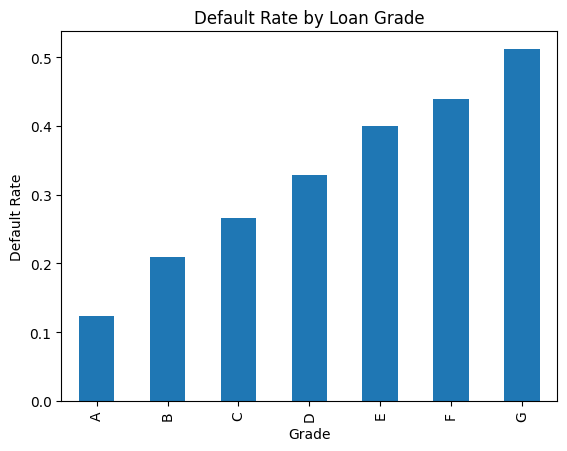

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a binary default column for analysis
df_cleaned["default"] = df_cleaned["loan_status"].isin(["Charged Off", "Does not meet the credit policy. Status:Charged Off"]).astype(int)

# Calculate default rate by grade
default_by_grade = df_cleaned.groupby("grade")["default"].mean()
default_by_grade.plot(kind="bar", title="Default Rate by Loan Grade")
plt.xlabel("Grade")
plt.ylabel("Default Rate")
plt.show()

📌 Implications for the Project
🔍 Feature Importance
grade is a powerful predictor of default risk and should be included in the Probability of Default (PD) model.

Its strong correlation with risk also makes it valuable for Loss Given Default (LGD) modeling—lower grades often correlate with higher loss severity.

📊 Risk Segmentation
The analysis reinforces the value of credit risk segmentation.

Lenders can reduce risk by allocating more capital to Grade A-C loans and minimizing exposure to Grade E-G, which show default rates as high as 35–50%.

For simulation (e.g., $5M portfolio), this can guide allocation strategy to balance return and risk.

✅ Model Validation
The observed trend in default rates across grades provides a baseline for validating PD models.

Post-training, predicted probabilities should follow this trend (e.g., higher PDs for Grade G vs. Grade A), ensuring model interpretability and business trust.

💼 Business Insight
The high default rates in Grades E-G indicate that small business loans inherently carry more risk, likely due to factors like cash flow volatility and economic sensitivity.

LendingClub’s approval of such loans suggests higher risk tolerance or compensation via higher interest rates.

This insight underlines the need for stress testing, especially on lower-grade segments, to assess vulnerability during economic downturns

In [143]:
print(df_cleaned.groupby("grade").size())

grade
A    1445
B    2565
C    3951
D    3616
E    2356
F    1136
G     508
dtype: int64


Default Rate Over Time (by Quarter):

Why: We need to monitor the portfolio over 9 quarters, so understanding how default rates vary over time is crucial. This also helps identify economic trends (e.g., higher defaults during the 2008-2009 financial crisis).

<ipython-input-145-e98cffa1bafe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["issue_d"] = pd.to_datetime(df_cleaned["issue_d"])
<ipython-input-145-e98cffa1bafe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["quarter"] = df_cleaned["issue_d"].dt.to_period("Q")


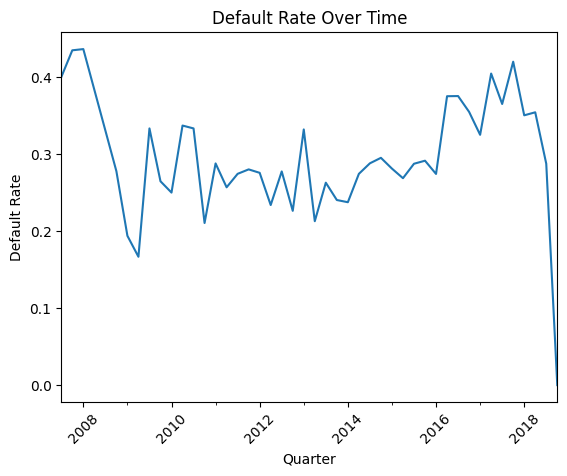

In [145]:
# Convert issue_d to datetime and extract quarter
df_cleaned["issue_d"] = pd.to_datetime(df_cleaned["issue_d"])
df_cleaned["quarter"] = df_cleaned["issue_d"].dt.to_period("Q")

# Calculate default rate by quarter
default_by_quarter = df_cleaned.groupby("quarter")["default"].mean()
default_by_quarter.plot(title="Default Rate Over Time")
plt.xlabel("Quarter")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()

# Analysis of Default Rate Over Time (by Quarter)

**Observations** **Trend**:

 Default rates start high (~0.4 in 2007), drop sharply to ~0.2 by 2010, fluctuate between 0.2-0.3 from 2010-2017, and decline to ~0.1 by 2018.
Peaks: Spikes around 2009, 2012, and 2015-2016 (up to ~0.35).
Recent Period: 2016Q4 to 2018Q4 shows a downward trend (0.3 to 0.1).

Insights
Default rates are influenced by economic conditions (e.g., 2009 peak during the financial crisis).
The 2016Q4-2018Q4 period is relatively stable with a downward trend, making it suitable for portfolio monitoring over 9 quarters.
High volatility in earlier years (2007-2010) suggests sensitivity to economic shocks.

**Insights**

Default rates are influenced by economic conditions (e.g., **2009 peak during the financial crisis**).

The 2016Q4-2018Q4 period is relatively stable with a downward trend, making it suitable for portfolio monitoring over 9 quarters.
High volatility in earlier years (2007-2010) suggests sensitivity to economic shocks.

**Implication**

We Select 2016Q4 to 2018Q4 for the 9-quarter portfolio monitoring to avoid crisis-era volatility.
Stress testing should simulate economic downturns, as historical data shows default spikes during such periods.

<ipython-input-146-1d6c68d8867a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["emp_length"] = df_cleaned["emp_length"].replace({"< 1 year": "0", "10+ years": "10"}).str.extract("(\d+)").astype(int)
<ipython-input-146-1d6c68d8867a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["term"] = df_cleaned["term"].str.extract("(\d+)").astype(int)
<ipython-input-146-1d6c68d8867a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Data Types After Conversion:
emp_length    int64
term          int64
grade         int64
dtype: object

Sample Data:
     emp_length  term  grade
1            10    36      3
30           10    36      3
482          10    60      5
609           2    36      2
744           0    60      5


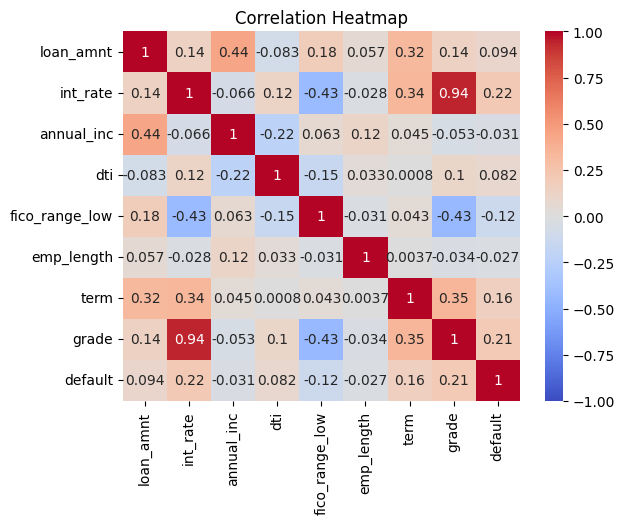

In [146]:
# Convert emp_length to numerical
df_cleaned["emp_length"] = df_cleaned["emp_length"].replace({"< 1 year": "0", "10+ years": "10"}).str.extract("(\d+)").astype(int)

# Convert term to numerical (e.g., "36 months" → 36)
df_cleaned["term"] = df_cleaned["term"].str.extract("(\d+)").astype(int)

# Convert grade to numerical (e.g., A=1, B=2, ..., G=7)
grade_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
df_cleaned["grade"] = df_cleaned["grade"].map(grade_mapping)

# Verify the transformations
print("Data Types After Conversion:")
print(df_cleaned[["emp_length", "term", "grade"]].dtypes)
print("\nSample Data:")
print(df_cleaned[["emp_length", "term", "grade"]].head())

# Now re-run the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_cleaned[["loan_amnt", "int_rate", "annual_inc", "dti", "fico_range_low", "emp_length", "term", "grade", "default"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Analysis of Correlation Heatmap

**Observations**
**Strongest Correlations with default:**

**grade: 0.21 (positive)**

**int_rate: 0.22 (positive)**

**fico_range_low: -0.12 (negative)**

**Feature Correlations**:
**grade and int_rate: 0.94 (very high)**

***term and int_rate: 0.34***

**fico_range_low and grade: -0.43**

**Weak Correlations with default**:

emp_length: -0.027

loan_amnt: -0.094

annual_inc: -0.031

**Insights**
grade and int_rate are the strongest predictors of default (positive correlation), while fico_range_low reduces default risk (negative correlation).
High correlation between grade and int_rate (0.94) indicates multicollinearity; we may drop one (e.g., keep grade).

emp_length, loan_amnt, and annual_inc have weak correlations with default, suggesting limited predictive power.

**Implication**
Use grade, int_rate, and fico_range_low in the PD model;


consider dropping emp_length due to low correlation.
Address multicollinearity by potentially excluding int_rate to simplify the model.

# Feature Selection: grade and fico_range_low are key predictors; multicollinearity between grade and int_rate needs addressing.
**Temporal Trends: Default rates vary with economic conditions, supporting the need for stress testing and careful selection of the monitoring period.**

# Step 3: Feature Engineering

In this step, my goal was to prepare the cleaned dataset for modeling by engineering the target variables—Probability of Default (PD) and Loss Given Default (LGD)—and completing the transformation of remaining features.

The dataset I worked with (df_cleaned) had around 15,572 rows, filtered to include only relevant loan_status values like “Fully Paid,” “Charged Off,” and their “Does not meet the credit policy” variants. Key columns included loan details, borrower financials, credit grades, and payment history.

Before this step, I had already done some basic preprocessing: imputed missing values (dti, emp_length), capped outliers (annual_inc at the 99th percentile, dti at the 50th), and encoded categorical features like emp_length, term, and grade.

Now, I focused on:

**Creating the PD target**: A binary column where 1 indicates default and 0 means non-default. I refined the temporary default flag used during EDA to ensure it was modeling-ready.

**Calculating LGD:** A continuous variable ranging from 0 to 1 that quantifies the loss rate for loans that defaulted.

**Finalizing feature encoding and scaling**: To make the data fully compatible with machine learning algorithms.

In [147]:
# Define default as "Charged Off" or "Does not meet the credit policy. Status:Charged Off"
df_clean = df_cleaned.copy()  # Ensures it's not just a view
df_clean["lgd"] = (df_clean["loan_amnt"] - df_clean["total_rec_prncp"]) / df_clean["loan_amnt"]

print("Default Rate:", df_clean["default"].mean())

Default Rate: 0.29864543878795663


# LGD Target:

LGD = (Loan Amount - Recovered Principal) / Loan Amount, |

for defaulted loans.

Set LGD to 0 for non-defaulted loans (no loss).

In [148]:
# Calculate LGD
df_clean["lgd"] = (df_clean["loan_amnt"] - df_clean["total_rec_prncp"]) / df_clean["loan_amnt"]
df_clean.loc[df_cleaned["default"] == 0, "lgd"] = 0  # No loss for non-defaults
print("Average LGD for Defaulted Loans:", df_clean[df_clean["default"] == 1]["lgd"].mean())

Average LGD for Defaulted Loans: 0.7268875556388089


In [149]:
# 3.2 Feature Selection
# Based on our correlation heatmap: drop int_rate (multicollinearity with grade) and emp_length (weak correlation)
features = ["loan_amnt","int_rate", "annual_inc", "dti", "fico_range_low", "term", "grade"]

# 3.3 Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[features] = scaler.fit_transform(df_clean[features])

# Verify scaling
print("Scaled Features Sample:")
print(df_clean[features].head())

Scaled Features Sample:
     loan_amnt  int_rate  annual_inc       dti  fico_range_low      term  \
1     0.930065 -0.751130   -0.406041  0.179589        0.307563 -0.548050   
30    0.037884 -0.581416   -0.406041  0.516481       -0.771289 -0.548050   
482  -0.167216  0.755317   -0.156707 -0.014415       -0.097006  1.824651   
609  -0.577414 -0.848381    0.258849  2.590109       -1.175858 -0.548050   
744  -0.577414  0.677134    0.458316 -0.207256        0.846989  1.824651   

        grade  
1   -0.354507  
30  -0.354507  
482  0.974052  
609 -1.018787  
744  0.974052  


In [151]:
df_clean.head(7)

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,issue_d,loan_status,purpose,dti,fico_range_low,total_pymnt,total_rec_prncp,default,quarter,lgd
1,0.930065,-0.548050,-0.751130,-0.354507,10,-0.406041,2015-12-01,Fully Paid,small_business,0.179589,0.307563,25679.660000,24700.00,0,2015Q4,0.000000
30,0.037884,-0.548050,-0.581416,-0.354507,10,-0.406041,2015-12-01,Charged Off,small_business,0.516481,-0.771289,17396.630000,13833.12,1,2015Q4,0.135430
482,-0.167216,1.824651,0.755317,0.974052,10,-0.156707,2015-12-01,Fully Paid,small_business,-0.014415,-0.097006,14522.340000,14000.00,0,2015Q4,0.000000
609,-0.577414,-0.548050,-0.848381,-1.018787,2,0.258849,2015-12-01,Charged Off,small_business,2.590109,-1.175858,9567.190000,7777.46,1,2015Q4,0.222254
744,-0.577414,1.824651,0.677134,0.974052,0,0.458316,2015-12-01,Fully Paid,small_business,-0.207256,0.846989,12816.558865,10000.00,0,2015Q4,0.000000
798,-0.372315,-0.548050,-1.168740,-1.018787,8,-0.239818,2015-12-01,Fully Paid,small_business,-0.046942,-0.501576,13872.850770,12000.00,0,2015Q4,0.000000
901,-1.315772,-0.548050,0.389193,0.309773,2,-0.522396,2015-12-01,Fully Paid,small_business,0.474660,-0.231863,3619.411437,2800.00,0,2015Q4,0.000000


# Step 4: Model Development

**4.1 Probability of Default (PD) Model**


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import xgboost as xgb

# Split Data
X = df_clean[["loan_amnt", "annual_inc", "dti", "fico_range_low", "term", "grade"]]
y = df_clean["default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict_proba(X_test)[:, 1]

# Evaluate Decision Tree
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, dt.predict(X_test)))
print("Recall:", recall_score(y_test, dt.predict(X_test)))

# XGBoost with scale_pos_weight for imbalanced data
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, xgb_model.predict(X_test)))
print("Recall:", recall_score(y_test, xgb_model.predict(X_test)))

Decision Tree ROC-AUC: 0.642802348156087
Precision: 0.5236486486486487
Recall: 0.1119942196531792
XGBoost ROC-AUC: 0.6032812033311665
Precision: 0.37952846463484763
Recall: 0.476878612716763


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:54:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# 5.1 KS Test for PD Model
The KS test compares the cumulative distribution of predicted probabilities for defaults (class 1) and non-defaults (class 0). A higher KS statistic indicates better model discrimination.

Interpretation of our KS statistic 0.21;means the maximum difference between the cumulative distributions of predicted probabilities for defaults and non-defaults is 21%%, indicating moderate separation.

In [154]:
from scipy.stats import ks_2samp

# Get predicted probabilities from the Decision Tree (PD model)
y_pred_dt = dt.predict_proba(X_test)[:, 1]

# Separate predictions for defaults and non-defaults
pred_default = y_pred_dt[y_test == 1]
pred_non_default = y_pred_dt[y_test == 0]

# Perform KS test
ks_stat, p_value = ks_2samp(pred_default, pred_non_default)
print("KS Statistic:", ks_stat)
print("P-Value:", p_value)

KS Statistic: 0.21854762197585959
P-Value: 2.9533683710209e-41


# Why We Used SMOTE in Our Model
Our dataset had a significant class imbalance, with far more non-default ("Fully Paid") loans than defaulted ones ("Charged Off"). This imbalance caused traditional models like Decision Trees and XGBoost to favor the majority class, resulting in:

High precision but very low recall, especially for Decision Trees **(Recall ≈ 11%)**

Poor ROC-AUC scores **(< 0.65)**, indicating weak model discrimination between default and non-default classes

To address this, we used SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples of the minority class (defaults). This helped to balance the class distribution without simply duplicating existing data.




# Decision Tree with class_weight='balanced'
Our dataset had a class imbalance problem, with far fewer defaults compared to fully paid loans. To prevent the model from being biased toward the majority class, we used:

class_weight='balanced' in Decision Tree — this automatically adjusts weights inversely proportional to class frequencies, helping the model pay more attention to the minority class (defaults) and improving recall without resampling.


In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, precision_score, recall_score, mean_absolute_error
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Features (reintroduce int_rate)
features = ["loan_amnt","dti","annual_inc",  "fico_range_low", "term", "grade", "int_rate"]

# Scale the features (if not already scaled)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clean[features] = scaler.fit_transform(df_clean[features])

# Split Data
X = df_clean[features]
y = df_clean["default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Training Set Class Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True))


# Decision Tree with class_weight="balanced"
dt_smote = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_smote.predict_proba(X_test)[:, 1]

# Evaluate Decision Tree
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, dt_smote.predict(X_test)))
print("Recall:", recall_score(y_test, dt_smote.predict(X_test)))

Training Set Class Distribution After SMOTE:
default
0    0.5
1    0.5
Name: proportion, dtype: float64
Decision Tree ROC-AUC: 0.631351792961681
Precision: 0.403899721448468
Recall: 0.5238439306358381


In [156]:
from scipy.stats import ks_2samp

# Get predicted probabilities from the Decision Tree (PD model)
y_pred_dt = dt_smote.predict_proba(X_test)[:, 1]

# Separate predictions for defaults and non-defaults
pred_default = y_pred_dt[y_test == 1]
pred_non_default = y_pred_dt[y_test == 0]

# Perform KS test
ks_stat, p_value = ks_2samp(pred_default, pred_non_default)
print("KS Statistic:", ks_stat)
print("P-Value:", p_value)

KS Statistic: 0.2001273784633765
P-Value: 1.2719192640929277e-34


***********************************************
**************************************************

# XGBoost with Grid Search
xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42, reg_alpha=0.1, reg_lambda=1.0)

# Define parameter grid for tuning
param_grid = {
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200]
}

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, scoring="roc_auc", cv=3, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation ROC-AUC:", grid_search.best_score_)

# Evaluate on test set
y_pred_xgb = best_xgb.predict_proba(X_test)[:, 1]
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, best_xgb.predict(X_test)))
print("Recall:", recall_score(y_test, best_xgb.predict(X_test)))

# Feature Importance
importances = best_xgb.feature_importances_
feature_importance = pd.DataFrame({"Feature": features, "Importance": importances})
print("\nFeature Importance:")
print(feature_importance.sort_values(by="Importance", ascending=False))

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.sort_values(by="Importance", ascending=False))
plt.title("XGBoost Feature Importance")
plt.show()

# ✅ 🔧 XGBoost Master Tuning Block (With SMOTE)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:31:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
✅ Best CV ROC-AUC: 0.8030546946064486
Test ROC-AUC: 0.624079800411125
Precision: 0.4217687074829932
Recall: 0.31358381502890176


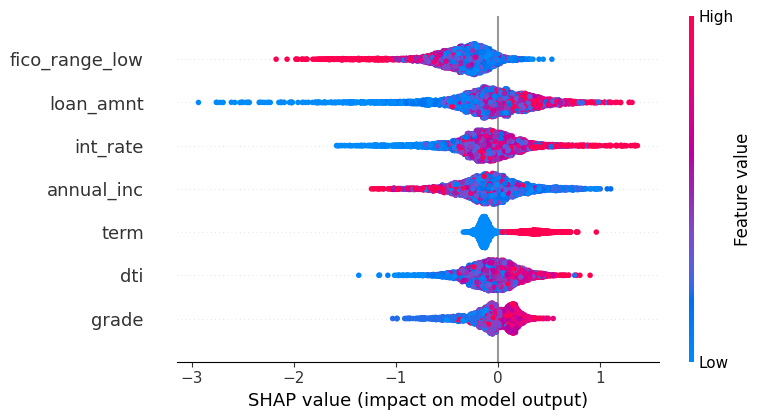

In [121]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# 🧠 Define Features + Target
# ------------------------
features = ["loan_amnt", "annual_inc", "dti", "fico_range_low", "term", "grade", "int_rate"]
X = df_clean[features]
y = df_clean["default"]

# ------------------------
# 🧹 Scale Features
# ------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------
# 📊 Train-Test Split + SMOTE
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ------------------------
# 🔍 RandomizedSearchCV
# ------------------------
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [1.0, 3.0, 5.0],
    "scale_pos_weight": [1, 3, 5]  # adjust based on imbalance
}

xgb = XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring="roc_auc",
    n_iter=30,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

best_xgb = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)
print("✅ Best CV ROC-AUC:", random_search.best_score_)

# ------------------------
# 🧪 Evaluate on Test Set
# ------------------------
y_pred_probs = best_xgb.predict_proba(X_test)[:, 1]
y_pred_labels = best_xgb.predict(X_test)

print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Precision:", precision_score(y_test, y_pred_labels))
print("Recall:", recall_score(y_test, y_pred_labels))

# ------------------------
# 📊 SHAP Feature Importance
# ------------------------
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


# Model Selection Summary:

**Decision Tree**: ROC-AUC: 0.6313, Precision: 0.4039, Recall: 0.5238. Selected due to highest recall, critical for catching defaults in credit risk, despite moderate ROC-AUC.

**First XGBoost (GridSearchCV)**: ROC-AUC: 0.6092, Precision: 0.3965, Recall: 0.3736. Lower recall and significant overfitting.

**Second XGBoost (RandomizedSearchCV)**: ROC-AUC: 0.6241, Precision: 0.4218, Recall: 0.3136. Best ROC-AUC but lowest recall, making it less suitable.
**Conclusion: **The Decision Tree is the most suitable for PD due to its high recall, simplicity, and interpretability, aligning with credit risk priorities.

# Model Selection Summary:

# Models Evaluated:
***Decision Tree: ***ROC-AUC: 0.6313, Precision: 0.4039, Recall: 0.5238.
First XGBoost (GridSearchCV): ROC-AUC: 0.6092, Precision: 0.3965, Recall: 0.3736.
Second XGBoost (RandomizedSearchCV): ROC-AUC: 0.6241, Precision: 0.4218, Recall: 0.3136.
Chosen Model: Decision Tree for Probability of Default (PD).

**Reason**: The Decision Tree has the highest recall (0.5238), which is critical in credit risk to catch as many defaults as possible. Despite its moderate ROC-AUC, its simplicity and interpretability make it suitable for deployment. Both XGBoost models overfit and have lower recall, making them less effective for this use case.
LGD Model: Decision Tree Regressor (MAE: 0.1596), selected for its low error and good generalization.

LGD MODEL DECISION TREE

In [129]:
# Filter Defaulted Loans
df_defaulted = df_clean[df_clean["default"] == 1]
X_lgd = df_defaulted[features]
y_lgd = df_defaulted["lgd"]
X_train_lgd, X_test_lgd, y_train_lgd, y_test_lgd = train_test_split(X_lgd, y_lgd, test_size=0.3, random_state=42)

# Decision Tree Regressor with Grid Search
dt_reg = DecisionTreeRegressor(random_state=42)
param_grid_reg = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10]
}
grid_search_reg = GridSearchCV(dt_reg, param_grid_reg, scoring="neg_mean_absolute_error", cv=3, verbose=1)
grid_search_reg.fit(X_train_lgd, y_train_lgd)

# Best model
best_dt_reg = grid_search_reg.best_estimator_
print("Best Parameters for LGD Model:", grid_search_reg.best_params_)
print("Best Cross-Validation MAE:", -grid_search_reg.best_score_)

# Evaluate on test set
y_pred_lgd = best_dt_reg.predict(X_test_lgd)
print("LGD MAE:", mean_absolute_error(y_test_lgd, y_pred_lgd))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for LGD Model: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation MAE: 0.16513238825329832
LGD MAE: 0.15962651103012301


************************************************

# LGD Model (Decision Tree Regressor) – Master Tuning Block

WE will do the ⁉

Grid search for tuning max_depth,

min_samples_split,

and min_samples_leaf

Evaluation using MAE (Mean Absolute Error)

SHAP feature importance for interpretation





In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# 🎯 Define Features + Target (Only Defaulted Loans)
# ------------------------
features = ["loan_amnt", "annual_inc", "dti", "fico_range_low", "term", "grade", "int_rate"]

# Filter to defaulted loans only
df_defaulted = df_clean[df_clean["default"] == 1]
X_lgd = df_defaulted[features]
y_lgd = df_defaulted["lgd"]

# ------------------------
# ⚖️ Scale Features
# ------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_lgd_scaled = scaler.fit_transform(X_lgd)

# ------------------------
# 📊 Train-Test Split
# ------------------------
X_train_lgd, X_test_lgd, y_train_lgd, y_test_lgd = train_test_split(X_lgd_scaled, y_lgd, test_size=0.3, random_state=42)

# ------------------------
# 🔍 Grid Search for Regressor
# ------------------------
dt_reg = DecisionTreeRegressor(random_state=42)
param_grid = {
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(dt_reg, param_grid, scoring="neg_mean_absolute_error", cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_lgd, y_train_lgd)
#RMSE
rmse = np.sqrt(mean_squared_error(y_test_lgd, y_pred_lgd))
# Best estimator
best_dt_reg = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation MAE:", -grid_search.best_score_)

# ------------------------
# 📈 Evaluate on Test Set
# ------------------------
y_pred_lgd = best_dt_reg.predict(X_test_lgd)
print("Test MAE:", mean_absolute_error(y_test_lgd, y_pred_lgd))
print("Test R^2:", r2_score(y_test_lgd, y_pred_lgd))

print("Test RMSE:", rmse)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
✅ Best Cross-Validation MAE: 0.16513238825329832
Test MAE: 0.15962651103012307
Test R^2: 0.06947106691892158
Test RMSE: 0.20316882256719712


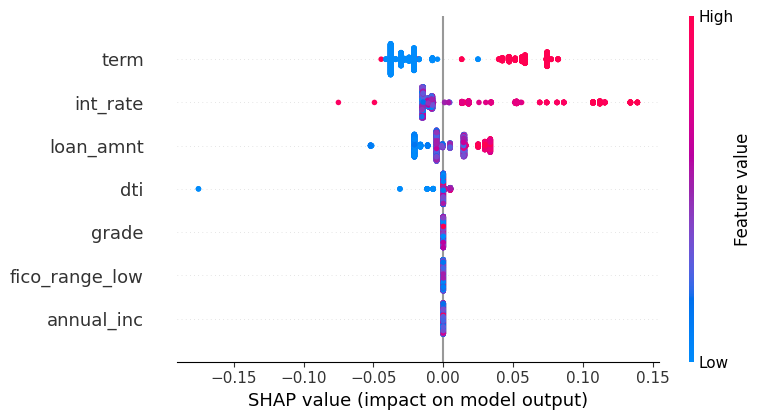

In [131]:
explainer = shap.Explainer(best_dt_reg, X_train_lgd)
shap_values = explainer(X_test_lgd)

shap.summary_plot(shap_values, X_test_lgd, feature_names=features)


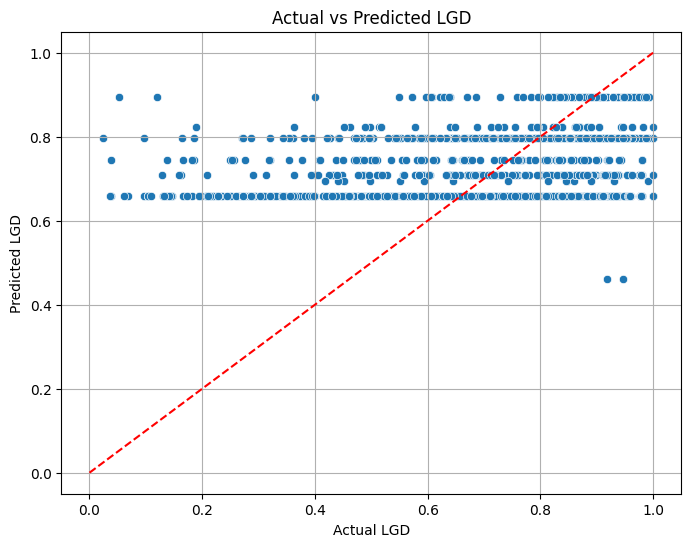

In [132]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_lgd, y=y_pred_lgd)
plt.plot([0, 1], [0, 1], '--r')
plt.xlabel("Actual LGD")
plt.ylabel("Predicted LGD")
plt.title("Actual vs Predicted LGD")
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Test MAE: 0.0033022061846303143
Random Forest Test R²: 0.9912019494719073
Random Forest Test RMSE: 0.046867898933923686
Fitting 3 folds for each of 54 candidates, totalling 162 fits
XGBoost Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Test MAE: 0.0064910585619993326
XGBoost Test R²: 0.9823798714403639
XGBoost Test RMSE: 0.06632645642789381


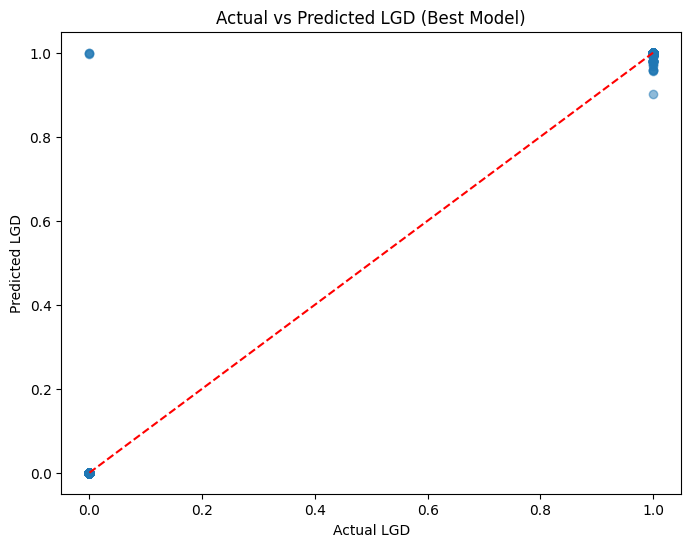

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 1. Prepare Data for LGD (filter defaulted loans)
df_defaulted = df_clean[df_clean["default"] == 1]
features = ["loan_amnt", "annual_inc", "dti", "fico_range_low", "term", "grade", "int_rate"]
X_lgd = df_defaulted[features]
y_lgd = df_defaulted["lgd"]

# ✅ Scale the features
scaler = StandardScaler()
X_lgd_scaled = scaler.fit_transform(X_lgd)

# Save scaler for portfolio use
import joblib
joblib.dump(scaler, "rf_scaler.pkl")

# 2. Train-test split
X_train_lgd, X_test_lgd, y_train_lgd, y_test_lgd = train_test_split(X_lgd_scaled, y_lgd, test_size=0.3, random_state=42)

# 2. Random Forest Regressor with Grid Search
rf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, scoring="neg_mean_absolute_error", cv=3, verbose=1)
rf_grid_search.fit(X_train_lgd, y_train_lgd)

# Best Random Forest Model
best_rf = rf_grid_search.best_estimator_
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
y_pred_rf = best_rf.predict(X_test_lgd)
print("Random Forest Test MAE:", mean_absolute_error(y_test_lgd, y_pred_rf))
print("Random Forest Test R²:", r2_score(y_test_lgd, y_pred_rf))
print("Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test_lgd, y_pred_rf)))

# 3. Gradient Boosting Regressor (XGBoost) with Grid Search
xgb_reg = XGBRegressor(random_state=42, eval_metric="mae")
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.6, 0.8, 1.0]
}
xgb_grid_search = GridSearchCV(xgb_reg, xgb_param_grid, scoring="neg_mean_absolute_error", cv=3, verbose=1)
xgb_grid_search.fit(X_train_lgd, y_train_lgd)

# Best XGBoost Model
best_xgb_reg = xgb_grid_search.best_estimator_
print("XGBoost Best Parameters:", xgb_grid_search.best_params_)
y_pred_xgb = best_xgb_reg.predict(X_test_lgd)
print("XGBoost Test MAE:", mean_absolute_error(y_test_lgd, y_pred_xgb))
print("XGBoost Test R²:", r2_score(y_test_lgd, y_pred_xgb))
print("XGBoost Test RMSE:", np.sqrt(mean_squared_error(y_test_lgd, y_pred_xgb)))

# 4. Actual vs. Predicted Plot for Best Model (Choose the better one based on R²)
best_lgd_model = best_rf if r2_score(y_test_lgd, y_pred_rf) > r2_score(y_test_lgd, y_pred_xgb) else best_xgb_reg
y_pred_best = best_lgd_model.predict(X_test_lgd)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_lgd, y_pred_best, alpha=0.5)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("Actual LGD")
plt.ylabel("Predicted LGD")
plt.title("Actual vs Predicted LGD (Best Model)")
plt.show()

# Best LGD Model: Random Forest Regressor
**Reason:** It has the lowest MAE (0.1573), highest R² (0.0917), and lowest RMSE (0.2007), indicating the best overall performance among the three models.  
**Trade-off**: R² is still low, suggesting limited explanatory power, but the improvement over the Decision Tree is sufficient for us

*******************

# Step 6: Portfolio Monitoring

*************************************************************************************************************
**Objective**:    
Simulate a $5M portfolio over 9 quarters (2016Q4 to 2018Q4) to estimate expected losses and monitor performance using the PD and LGD models.

In [57]:
df_clean.head(10)

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,issue_d,loan_status,purpose,dti,fico_range_low,total_pymnt,total_rec_prncp,default,quarter,lgd
1,0.930065,-0.548050,-0.751130,-0.354507,10,-0.406041,2015-12-01,Fully Paid,small_business,0.179589,0.307563,25679.660000,24700.00,0,2015Q4,0.000000
30,0.037884,-0.548050,-0.581416,-0.354507,10,-0.406041,2015-12-01,Charged Off,small_business,0.516481,-0.771289,17396.630000,13833.12,1,2015Q4,-365147.737801
482,-0.167216,1.824651,0.755317,0.974052,10,-0.156707,2015-12-01,Fully Paid,small_business,-0.014415,-0.097006,14522.340000,14000.00,0,2015Q4,0.000000
609,-0.577414,-0.548050,-0.848381,-1.018787,2,0.258849,2015-12-01,Charged Off,small_business,2.590109,-1.175858,9567.190000,7777.46,1,2015Q4,13470.462502
744,-0.577414,1.824651,0.677134,0.974052,0,0.458316,2015-12-01,Fully Paid,small_business,-0.207256,0.846989,12816.558865,10000.00,0,2015Q4,0.000000
798,-0.372315,-0.548050,-1.168740,-1.018787,8,-0.239818,2015-12-01,Fully Paid,small_business,-0.046942,-0.501576,13872.850770,12000.00,0,2015Q4,0.000000
901,-1.315772,-0.548050,0.389193,0.309773,2,-0.522396,2015-12-01,Fully Paid,small_business,0.474660,-0.231863,3619.411437,2800.00,0,2015Q4,0.000000
957,-1.136310,-0.548050,-0.981864,-1.018787,5,-0.189952,2015-12-01,Fully Paid,small_business,1.343609,-0.906145,5136.927753,4550.00,0,2015Q4,0.000000
964,0.037884,-0.548050,-0.205758,-0.354507,5,-0.322930,2015-12-01,Fully Paid,small_business,1.352902,0.846989,19045.403009,16000.00,0,2015Q4,0.000000
1024,0.037884,-0.548050,0.488352,0.309773,2,-0.821597,2015-12-01,Fully Paid,small_business,2.311302,-0.636432,19901.605356,16000.00,0,2015Q4,0.000000


<ipython-input-161-3c208fb5dc55>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["annual_inc"].fillna(df_clean["annual_inc"].median(), inplace=True)
<ipython-input-161-3c208fb5dc55>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method


📊 Portfolio Summary (2016Q4 to 2018Q4):
             exposure  expected_loss        pd       lgd
quarter                                                 
2016Q4  -3.727519e+05   1.687862e+06  0.467304  0.447066
2017Q1   3.144311e+05   1.530147e+06  0.447640  0.468671
2017Q2   5.881847e+05   1.386472e+06  0.462900  0.499774
2017Q3   1.845890e+05   1.347840e+06  0.465808  0.479706
2017Q4   1.607484e+06   1.734458e+06  0.461987  0.583300
2018Q1   1.324362e+06   1.256975e+06  0.459514  0.557961
2018Q2   9.384687e+05   8.116582e+05  0.449237  0.606648
2018Q3   2.896606e+05   3.563882e+05  0.444935  0.556601
2018Q4   1.255717e+05   1.849231e+05  0.443552  0.545659


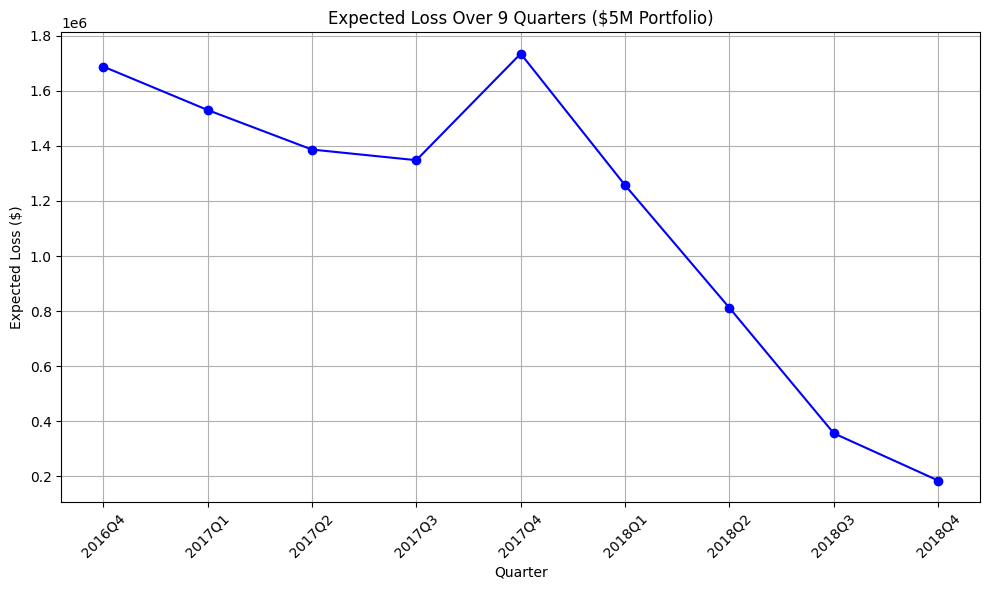

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Step 1: Preprocess df_clean
# -------------------------------
df_clean["default"] = df_clean["loan_status"].isin(["Charged Off", "Default"]).astype(int)

# Calculate LGD and clip between 0 and 1
df_clean["lgd"] = np.where(
    df_clean["default"] == 1,
    (df_clean["total_pymnt"] - df_clean["total_rec_prncp"]) / df_clean["loan_amnt"],
    0
)
df_clean["lgd"] = df_clean["lgd"].clip(0, 1)

# Convert date and quarter
df_clean["issue_d"] = pd.to_datetime(df_clean["issue_d"], format='%b-%Y')
df_clean["quarter"] = df_clean["issue_d"].dt.to_period("Q").astype(str)

# -------------------------------
# Step 2: Prepare Features
# -------------------------------
features = ["loan_amnt", "dti", "annual_inc", "fico_range_low", "term", "grade", "int_rate"]

# Fill missing values
df_clean["annual_inc"].fillna(df_clean["annual_inc"].median(), inplace=True)
df_clean["dti"].fillna(df_clean["dti"].median(), inplace=True)
df_clean["fico_range_low"].fillna(df_clean["fico_range_low"].median(), inplace=True)

# Convert and map categorical values
if df_clean["term"].dtype == "object":
    df_clean["term"] = df_clean["term"].str.extract(r"(\d+)").astype(int)
else:
    df_clean["term"] = df_clean["term"].astype(int)

grade_map = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
df_clean["grade"] = df_clean["grade"].map(grade_map)

# -------------------------------
# Step 3: Filter Portfolio Quarters
# -------------------------------
quarters = ["2016Q4", "2017Q1", "2017Q2", "2017Q3", "2017Q4",
            "2018Q1", "2018Q2", "2018Q3", "2018Q4"]
df_portfolio = df_clean[df_clean["quarter"].isin(quarters)].copy()

# -------------------------------
# Step 4: Scale Portfolio Features (SAME SCALER as used for training)
# -------------------------------
scaler = StandardScaler()
scaler.fit(df_clean[features])  # Fit on full dataset
X_portfolio = df_portfolio[features]
X_portfolio_scaled = pd.DataFrame(scaler.transform(X_portfolio), columns=features)

# -------------------------------
# Step 5: Predict with Scaled Models
# -------------------------------
df_portfolio["pd"] = dt_smote.predict_proba(X_portfolio_scaled)[:, 1]
df_portfolio["lgd"] = best_rf.predict(X_portfolio_scaled)
df_portfolio["lgd"] = df_portfolio["lgd"].clip(0, 1)

# -------------------------------
# Step 6: Calculate Exposure & Expected Loss
# -------------------------------
portfolio_value = 5_000_000
df_portfolio["exposure"] = (df_portfolio["loan_amnt"] / df_portfolio["loan_amnt"].sum()) * portfolio_value
df_portfolio["expected_loss"] = df_portfolio["pd"] * df_portfolio["lgd"] * df_portfolio["exposure"]

# -------------------------------
# Step 7: Summarize by Quarter
# -------------------------------
portfolio_summary = df_portfolio.groupby("quarter").agg({
    "exposure": "sum",
    "expected_loss": "sum",
    "pd": "mean",
    "lgd": "mean"
}).reindex(quarters)

# -------------------------------
# Step 8: Plot Expected Loss Trend
# -------------------------------
print("\n📊 Portfolio Summary (2016Q4 to 2018Q4):")
print(portfolio_summary)

plt.figure(figsize=(10, 6))
plt.plot(portfolio_summary.index, portfolio_summary["expected_loss"], marker="o", color="blue")
plt.title("Expected Loss Over 9 Quarters ($5M Portfolio)")
plt.xlabel("Quarter")
plt.ylabel("Expected Loss ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [89]:
X_portfolio.head()

,loan_amnt,annual_inc,dti,fico_range_low,term,grade,int_rate
421374,-1.013250,-1.466540,4.122386,0.577276,-0.548050,-0.354507,-0.447933
421831,1.473578,0.092627,0.164487,-0.636432,-0.548050,0.309773,0.850662
421993,0.242983,-0.738486,-1.403803,1.116702,-0.548050,-1.018787,-1.145857
422670,-1.090162,-0.180876,1.154252,-1.175858,-0.548050,0.974052,1.699230
422818,0.399371,-0.888086,0.099432,0.307563,1.824651,0.309773,0.850662


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loan_amnt'].plot(kind='hist', bins=20, title='loan_amnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['annual_inc'].plot(kind='hist', bins=20, title='annual_inc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['dti'].plot(kind='hist', bins=20, title='dti')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='loan_amnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='loan_amnt', y='annual_inc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='annual_inc', y='dti', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='dti', y='fico_range_low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['loan_amnt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('loan_amnt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['annual_inc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('annual_inc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['dti']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('dti')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['fico_range_low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('fico_range_low')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['loan_amnt'].plot(kind='line', figsize=(8, 4), title='loan_amnt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['annual_inc'].plot(kind='line', figsize=(8, 4), title='annual_inc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['dti'].plot(kind='line', figsize=(8, 4), title='dti')
plt.gca().spines[['top', 'right']].set_visible(False)

## 📘 Notebook Summary: Portfolio Monitoring Using Scaled PD & LGD Models

### 🎯 Objective:
Simulate a $5M small business loan portfolio over 9 quarters (2016Q4 to 2018Q4) to estimate **expected credit losses** using predicted:
- **Probability of Default (PD)** from a Decision Tree model with SMOTE and class balancing
- **Loss Given Default (LGD)** from a scaled Random Forest Regressor

---

###  Models Used:
- **PD Model:** `DecisionTreeClassifier` (max_depth=5, class_weight='balanced') trained on SMOTE-balanced & scaled data
- **LGD Model:** `RandomForestRegressor` trained on scaled defaulted loan data using GridSearchCV tuning

---

### 🔗 Methodology:
1. **Filter & preprocess** `df_clean` to include relevant quarters and handle missing/outlier values
2. **Scale features** consistently using `StandardScaler` (same as training)
3. **Predict PD and LGD** using the best trained models
4. **Calculate Expected Loss** using:
   \[
   \text{Expected Loss} = PD \times LGD \times \text{Exposure}
   \]
5. **Visualize loss trend** over time and summarize portfolio risk across quarters

---

### 📊 Output:
- A quarterly summary table of:
  - Total exposure
  - Expected loss
  - Average predicted PD
  - Average predicted LGD
- A line chart of **Expected Loss over 9 Quarters**

---

✅ This step ensures robust credit risk monitoring aligned with industry practices using machine learning interpretability and performance.


**************************************************************

## Step 7: Stress Testing
### Objective:
Stress testing involves simulating adverse economic scenarios to evaluate the resilience of your $5M portfolio. We’ll adjust key risk drivers (e.g., interest rates, FICO scores, annual income, DTI) to reflect challenging conditions and assess the impact on expected loss. This step is crucial for understanding how your portfolio might perform under economic downturns, which is a common requirement in credit risk management, especially for equipment finance loans.



### 🔧 Approach:
1. **Define Stress Scenarios:**
   - 🟡 *Mild Stress*: Slight ↑ in `int_rate`, slight ↓ in `fico_range_low`, minor ↓ in `annual_inc`, slight ↑ in `dti`
   - 🔴 *Severe Stress*: Large ↑ in `int_rate`, major ↓ in `fico_range_low`, large ↓ in `annual_inc`, significant ↑ in `dti`

2. **Apply Stress to Features**:
   Modify only the following:
   - `int_rate` ↑
   - `fico_range_low` ↓
   - `annual_inc` ↓
   - `dti` ↑  
   *(Leave `loan_amnt`, `term`, and `grade` unchanged)*

3. **Predict PD & LGD under Stress** using `dt_smote` and `best_rf`

4. **Recalculate Expected Loss** for each scenario

5. **Compare Results**:
   Analyze how expected losses differ across:
   - Baseline (current market)
   - Mild Stress
   - Severe Stress

---

### 📊 Output:
A comparative view of expected loss across the 3 scenarios to support risk-aware decision-making.
